In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen
import plotly.io as pi
import json
pi.renderers.default = "colab"

In [ ]:
dates=pd.read_csv("/content/dim_date.csv")
districts=pd.read_csv("/content/dim_districts.csv")
ts_ipass=pd.read_csv("/content/fact_TS_iPASS.csv")
stamps=pd.read_csv("/content/fact_stamps.csv")
transport=pd.read_csv("/content/fact_transport.csv")

In [ ]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        48 non-null     object
 1   Mmm          48 non-null     object
 2   quarter      48 non-null     object
 3   fiscal_year  48 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [ ]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   dist_code  33 non-null     object
 1   district   33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [ ]:
stamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504 entries, 0 to 1503
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   dist_code                 1504 non-null   object
 1   month                     1504 non-null   object
 2   documents_registered_cnt  1504 non-null   int64 
 3   documents_registered_rev  1504 non-null   int64 
 4   estamps_challans_cnt      1504 non-null   int64 
 5   estamps_challans_rev      1504 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 70.6+ KB


In [ ]:
stamps.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
dtype: int64

In [ ]:
transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   dist_code                  1440 non-null   object
 1   month                      1440 non-null   object
 2   fuel_type_petrol           1440 non-null   int64 
 3   fuel_type_diesel           1440 non-null   int64 
 4   fuel_type_electric         1440 non-null   int64 
 5   fuel_type_others           1440 non-null   int64 
 6   vehicleClass_MotorCycle    1440 non-null   int64 
 7   vehicleClass_MotorCar      1440 non-null   int64 
 8   vehicleClass_AutoRickshaw  1440 non-null   int64 
 9   vehicleClass_Agriculture   1440 non-null   int64 
 10  vehicleClass_others        1440 non-null   int64 
 11  seatCapacity_1_to_3        1440 non-null   int64 
 12  seatCapacity_4_to_6        1440 non-null   int64 
 13  seatCapacity_above_6       1440 non-null   int64 
 14  Brand_ne

In [ ]:
ts_ipass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5753 entries, 0 to 5752
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dist_code            5753 non-null   object 
 1   month                5753 non-null   object 
 2   sector               5753 non-null   object 
 3   investment in cr     5753 non-null   float64
 4   number_of_employees  5753 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 224.9+ KB


In [ ]:
#changing the date into datetime object.
dates["month"]=pd.to_datetime(dates["month"])
stamps["month"]=pd.to_datetime(stamps["month"])
transport["month"]=pd.to_datetime(transport["month"])
ts_ipass["month"]=pd.to_datetime(ts_ipass["month"])

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
stamps.describe()

documents_registered_cnt  documents_registered_rev  \
count                   1504.00                   1504.00   
mean                    3238.01              196296059.68   
std                     4196.00              522459086.21   
min                        0.00                      0.00   
25%                     1013.50               18406550.25   
50%                     1964.50               35122414.50   
75%                     3952.50               93397986.00   
max                    31310.00             4073496212.00   

       estamps_challans_cnt  estamps_challans_rev  
count               1504.00               1504.00  
mean                1944.86          146729889.80  
std                 3740.31          496371751.40  
min                    0.00                  0.00  
25%                    0.00                  0.00  
50%                  805.00           17990396.00  
75%                 2198.00           52994113.50  
max                30526.00         4294273078.00

In [ ]:
transport.describe()

fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
count           1440.00           1440.00             1440.00   
mean            3835.60            659.29               71.99   
std             5245.79            684.82              247.60   
min                0.00              0.00                0.00   
25%             1346.25            261.75                2.00   
50%             2067.50            445.50                8.00   
75%             3412.00            744.00               35.00   
max            39689.00           5270.00             2782.00   

       fuel_type_others  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
count           1440.00                  1440.00                1440.00   
mean              62.13                  3340.27                 719.74   
std              204.99                  4349.41                1455.49   
min                0.00                     0.00                   0.00   
25%                2.00                  1229.75                 123.00   
50%                6.00                  1887.00                 228.50   
75%               34.00                  3149.25                 432.50   
max             2326.00                 35420.00                8036.00   

       vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
count                    1440.00                   1440.00   
mean                       93.85                    135.91   
std                       197.18                    118.49   
min                         0.00                      0.00   
25%                        16.00                     49.00   
50%                        36.00                    105.00   
75%                        90.00                    189.00   
max                      2287.00                    786.00   

       vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
count              1440.00              1440.00              1440.00   
mean                339.33              3750.52               768.72   
std                 449.47              4609.41              1413.93   
min                   0.00                 6.00                 0.00   
25%                 122.00              1486.25               154.00   
50%                 199.00              2244.50               273.00   
75%                 332.25              3635.50               543.50   
max                4299.00             36694.00              7918.00   

       seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
count               1440.00             1440.00             1440.00   
mean                 108.19             4317.78              311.34   
std                  209.77             5531.41              648.26   
min                    0.00                6.00                0.00   
25%                   20.00             1629.75               57.00   
50%                   38.00             2457.00              101.00   
75%                   75.25             4095.25              167.00   
max                 1337.00            42073.00             4450.00   

       category_Non-Transport  category_Transport  
count                 1440.00             1440.00  
mean                  4213.10              416.02  
std                   5693.80              525.92  
min                      6.00                0.00  
25%                   1497.00              149.00  
50%                   2295.00              250.00  
75%                   3783.25              449.25  
max                  42074.00             4239.00

In [ ]:
ts_ipass.describe()

investment in cr  number_of_employees
count           5753.00              5753.00
mean              17.23               117.34
std              257.43              1398.73
min                0.00                 0.00
25%                0.22                 7.00
50%                0.74                15.00
75%                3.12                40.00
max            17793.35             57000.00

- the data of columns(stamps.ts_ipass,transport) seems to be highly skewed there can be outliers. need to see if it is valid or not.

In [ ]:
ts_ipass.corr()

<ipython-input-15-b72d1c406187>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



investment in cr  number_of_employees
investment in cr                 1.00                 0.30
number_of_employees              0.30                 1.00

In [ ]:
ts_ipass

dist_code      month                              sector  \
0         14_1 2019-01-04                         Engineering   
1         19_1 2019-01-04                         Engineering   
2         20_3 2019-01-04                    Wood and Leather   
3         20_3 2019-01-04                            Textiles   
4         21_5 2019-01-04  Electrical and Electronic Products   
...        ...        ...                                 ...   
5748      20_4 2023-01-03                         Engineering   
5749      20_4 2023-01-03                     Food Processing   
5750      20_4 2023-01-03                              Others   
5751      21_1 2023-01-03                     Food Processing   
5752      20_2 2023-01-03                     Food Processing   

      investment in cr  number_of_employees  
0                 2.32                   15  
1                 0.62                   13  
2                 0.20                    8  
3                 0.27                   27  
4                 0.12                    5  
...                ...                  ...  
5748              0.12                    3  
5749              0.75                    9  
5750              7.75                   10  
5751              0.32                    9  
5752              4.75                   68  

[5753 rows x 5 columns]

In [ ]:
stamps.corr()

<ipython-input-17-844c9c0daa18>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



documents_registered_cnt  documents_registered_rev  \
documents_registered_cnt                      1.00                      0.87   
documents_registered_rev                      0.87                      1.00   
estamps_challans_cnt                          0.67                      0.81   
estamps_challans_rev                          0.68                      0.91   

                          estamps_challans_cnt  estamps_challans_rev  
documents_registered_cnt                  0.67                  0.68  
documents_registered_rev                  0.81                  0.91  
estamps_challans_cnt                      1.00                  0.92  
estamps_challans_rev                      0.92                  1.00

In [ ]:
transport.corr()

<ipython-input-18-be1840941a3a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



fuel_type_petrol  fuel_type_diesel  \
fuel_type_petrol                       1.00              0.89   
fuel_type_diesel                       0.89              1.00   
fuel_type_electric                     0.60              0.47   
fuel_type_others                       0.63              0.50   
vehicleClass_MotorCycle                0.99              0.89   
vehicleClass_MotorCar                  0.93              0.85   
vehicleClass_AutoRickshaw              0.43              0.39   
vehicleClass_Agriculture              -0.16              0.03   
vehicleClass_others                    0.85              0.93   
seatCapacity_1_to_3                    0.99              0.90   
seatCapacity_4_to_6                    0.96              0.87   
seatCapacity_above_6                   0.93              0.87   
Brand_new_vehicles                     1.00              0.91   
Pre-owned_vehicles                     0.95              0.82   
category_Non-Transport                 1.00              0.90   
category_Transport                     0.85              0.90   

                           fuel_type_electric  fuel_type_others  \
fuel_type_petrol                         0.60              0.63   
fuel_type_diesel                         0.47              0.50   
fuel_type_electric                       1.00              0.53   
fuel_type_others                         0.53              1.00   
vehicleClass_MotorCycle                  0.60              0.66   
vehicleClass_MotorCar                    0.66              0.52   
vehicleClass_AutoRickshaw                0.25              0.84   
vehicleClass_Agriculture                -0.21             -0.17   
vehicleClass_others                      0.53              0.50   
seatCapacity_1_to_3                      0.59              0.65   
seatCapacity_4_to_6                      0.66              0.62   
seatCapacity_above_6                     0.73              0.60   
Brand_new_vehicles                       0.60              0.65   
Pre-owned_vehicles                       0.78              0.67   
category_Non-Transport                   0.62              0.64   
category_Transport                       0.53              0.72   

                           vehicleClass_MotorCycle  vehicleClass_MotorCar  \
fuel_type_petrol                              0.99                   0.93   
fuel_type_diesel                              0.89                   0.85   
fuel_type_electric                            0.60                   0.66   
fuel_type_others                              0.66                   0.52   
vehicleClass_MotorCycle                       1.00                   0.90   
vehicleClass_MotorCar                         0.90                   1.00   
vehicleClass_AutoRickshaw                     0.47                   0.24   
vehicleClass_Agriculture                     -0.15                  -0.23   
vehicleClass_others                           0.84                   0.82   
seatCapacity_1_to_3                           1.00                   0.90   
seatCapacity_4_to_6                           0.93                   0.99   
seatCapacity_above_6                          0.91                   0.95   
Brand_new_vehicles                            1.00                   0.93   
Pre-owned_vehicles                            0.93                   0.95   
category_Non-Transport                        0.99                   0.94   
category_Transport                            0.86                   0.76   

                           vehicleClass_AutoRickshaw  \
fuel_type_petrol                                0.43   
fuel_type_diesel                                0.39   
fuel_type_electric                              0.25   
fuel_type_others                                0.84   
vehicleClass_MotorCycle                         0.47   
vehicleClass_MotorCar                           0.24   
vehicleClass_AutoRickshaw                       1.00   
vehicleClass_Agricultur

# EDA after Categorising all the columns
### Stamps
- **Numerical** - all columns
- **documents_registered_cnt** - Highly positively skewed.
### Transports
- **Numerical** - leaving dist_code and month all are numerical column
### Ts_ipass
- **Numerical** - investment_in_cr , no_of_employees
- **Categorical** - sector

In [ ]:
stamps["documents_registered_cnt"].skew()

3.3357696591474624

In [ ]:
stamps[stamps["documents_registered_cnt"] >10000]

dist_code      month  documents_registered_cnt  documents_registered_rev  \
10        15_2 2019-04-01                     14140                1080766807   
28        15_1 2019-04-01                     29436                2026355727   
54        15_1 2019-05-01                     31310                2027201202   
62        15_2 2019-05-01                     16036                1231074513   
73        15_1 2019-06-01                     24084                2089441609   
...        ...        ...                       ...                       ...   
1423      15_1 2023-01-01                     17671                2968698366   
1440      15_1 2023-02-01                     19027                2975677528   
1468      15_2 2023-02-01                     12810                1916206633   
1480      15_2 2023-03-01                     14960                2205243820   
1498      15_1 2023-03-01                     21524                3573491897   

      estamps_challans_cnt  estamps_challans_rev  
10                       0                     0  
28                       0                     0  
54                       0                     0  
62                       0                     0  
73                       0                     0  
...                    ...                   ...  
1423                 19201            2911793905  
1440                 19878            3009512192  
1468                 13465            1845582136  
1480                 15946            2182774900  
1498                 23030            3716779175  

[81 rows x 6 columns]

In [ ]:
stamps[stamps["documents_registered_cnt"] <=0]

dist_code      month  documents_registered_cnt  documents_registered_rev  \
578      20_4 2020-10-01                         0                         0   
581      14_3 2020-10-01                         0                         0   
585      21_5 2020-10-01                         0                         0   
587      21_3 2020-10-01                         0                         0   
594      17_1 2020-10-01                         0                         0   
596      21_6 2020-10-01                         0                         0   
598      14_5 2020-10-01                         0                         0   
600      19_4 2020-10-01                         0                         0   
603      19_2 2020-10-01                         0                         0   
608      21_5 2020-11-01                         0                         0   
612      21_2 2020-11-01                         0                         0   
616      14_3 2020-11-01                         0                         0   
620      19_2 2020-11-01                         0                         0   
623      14_4 2020-11-01                         0                         0   
627      21_6 2020-11-01                         0                         0   
628      14_5 2020-11-01                         0                         0   
632      23_3 2020-11-01                         0                         0   
634      23_1 2020-11-01                         0                         0   
636      19_4 2020-11-01                         0                         0   
637      17_1 2020-11-01                         0                         0   
639      21_3 2020-11-01                         0                         0   

     estamps_challans_cnt  estamps_challans_rev  
578                     0                     0  
581                     0                     0  
585                     0                     0  
587                     0                     0  
594                     0                     0  
596                     0                     0  
598                     0                     0  
600                     0                     0  
603                     0                     0  
608                     0                     0  
612                     0                     0  
616                     0                     0  
620                     0                     0  
623                     0                     0  
627                     0                     0  
628                     0                     0  
632                     0                     0  
634                     0                     0  
636                     0                     0  
637                     0                     0  
639                     0                     0

In [ ]:
#dropping column having 0 value
stamps.drop(stamps.index[[578,581,585,587,594,596,598,600,603,608,612,616,620,623,627,628,632,634,636,637,639]],inplace=True)

In [ ]:
stamps

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0         14_1 2019-04-01                      4533                  59236363   
1         17_3 2019-04-01                      4151                  41508762   
2         20_3 2019-04-01                      2116                  23674170   
3         21_5 2019-04-01                      1089                  15915285   
4         23_1 2019-04-01                      6133                  82593256   
...        ...        ...                       ...                       ...   
1499      20_4 2023-03-01                      1510                  54036552   
1500      14_5 2023-03-01                       980                  23898383   
1501      21_1 2023-03-01                      4321                 279791569   
1502      22_2 2023-03-01                      1255                  18695648   
1503      23_1 2023-03-01                      5806                 132022152   

      estamps_challans_cnt  estamps_challans_rev  
0                        0                     0  
1                        0                     0  
2                        0                     0  
3                        0                     0  
4                        0                     0  
...                    ...                   ...  
1499                  1596              57171081  
1500                  1026              23106330  
1501                  4642             284765300  
1502                  1566              22453502  
1503                  5997             135318190  

[1483 rows x 6 columns]

In [ ]:
stamps["documents_registered_rev"].skew()

4.208634426833167

In [ ]:
def plot_graphs(column_name):
  sns.displot(kind="hist",kde=True,data=stamps,x=column_name,label=column_name)
  sns.catplot(kind="box",data=stamps,x=column_name)

In [ ]:
print(len(stamps.columns))

6


In [ ]:
num_columns=stamps.select_dtypes(include=['int64']).iloc[:,:].columns

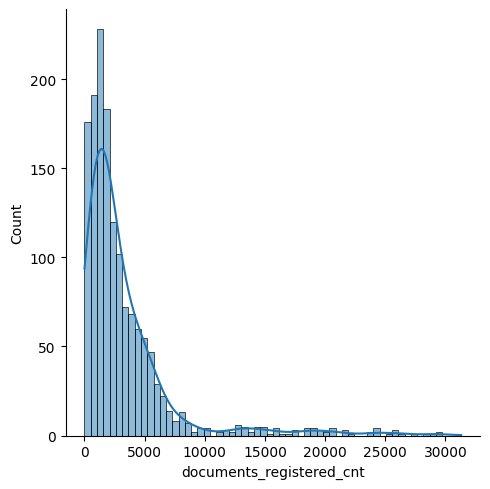

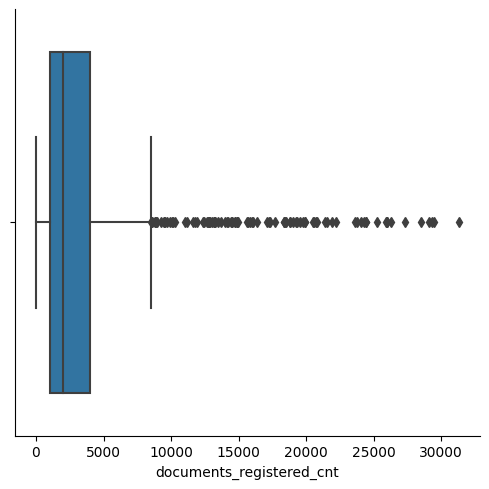

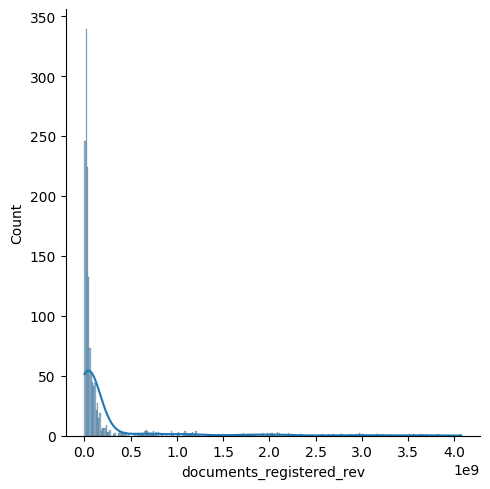

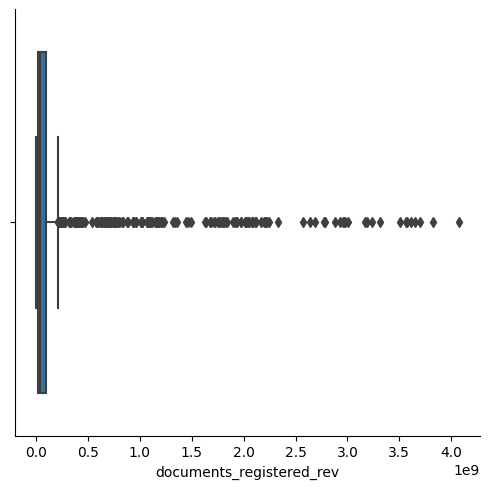

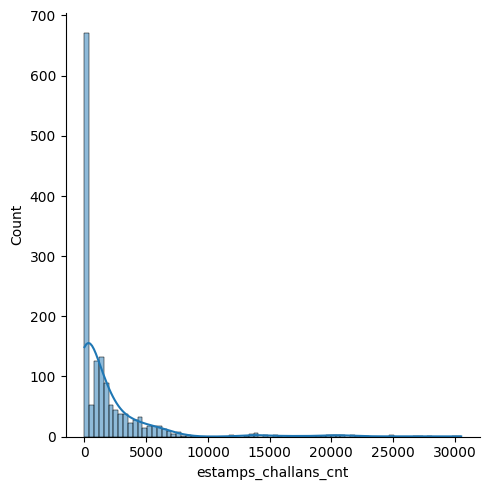

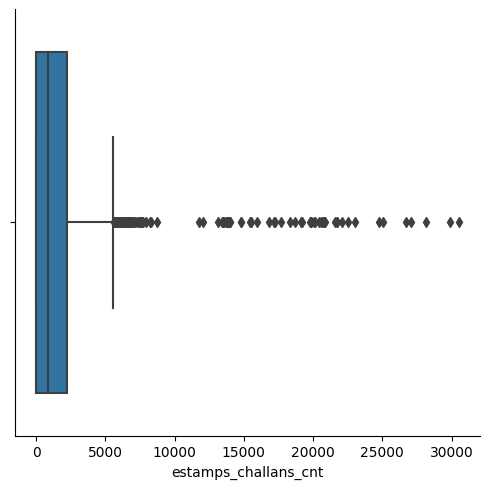

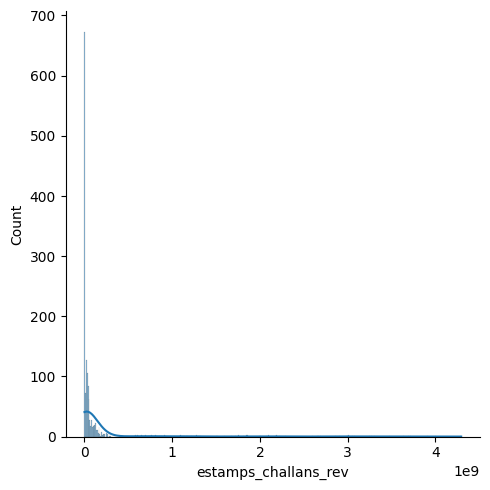

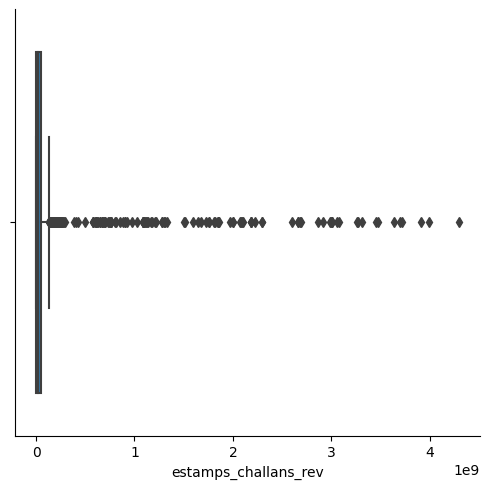

In [ ]:
for col in num_columns:
  plot_graphs(col)

In [ ]:
#Transport univariate analysis
transport.head()

dist_code      month  fuel_type_petrol  fuel_type_diesel  \
0      15_1 2019-04-01             17910              3011   
1      18_2 2019-04-01              3066               306   
2      20_3 2019-04-01              1577               215   
3      21_3 2019-04-01              1961               281   
4      21_7 2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport  
0                   19856                1163  
1                    3203                 175  
2                    1648                 144  
3                    2075                 169  
4                    1701                 160

In [ ]:
def plot_graphs(column_name):
  sns.displot(kind="hist",kde=True,data=transport,x=column_name,label=column_name)
  sns.catplot(kind="box",data=transport,x=column_name)

In [ ]:
num_columns=transport.select_dtypes(include=['int64']).iloc[:,:].columns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



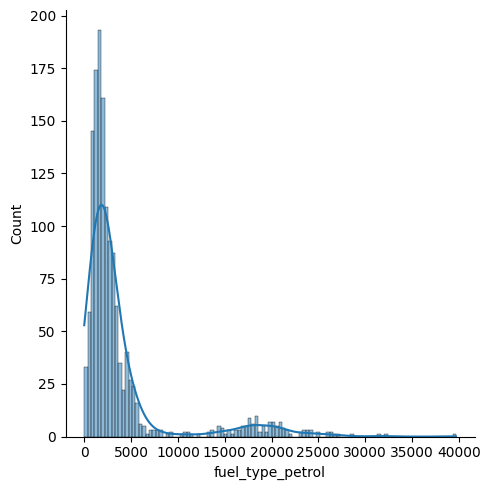

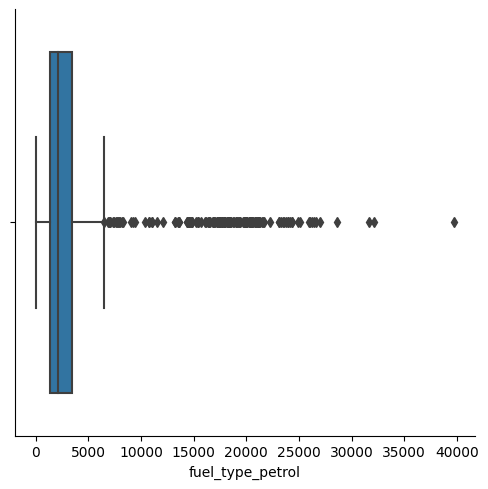

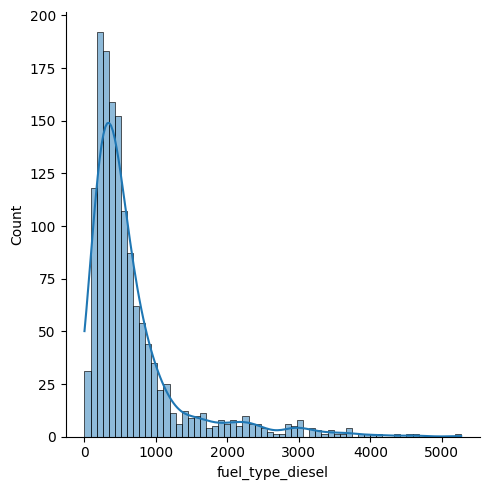

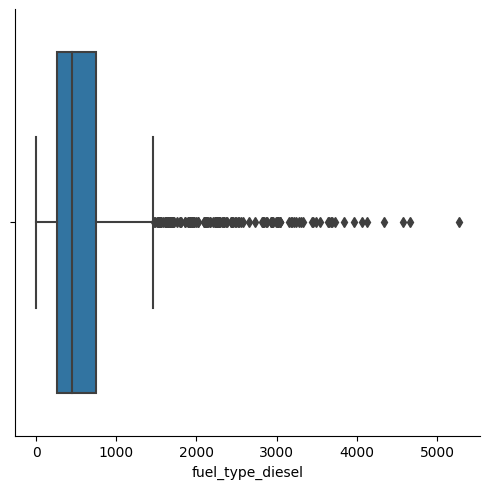

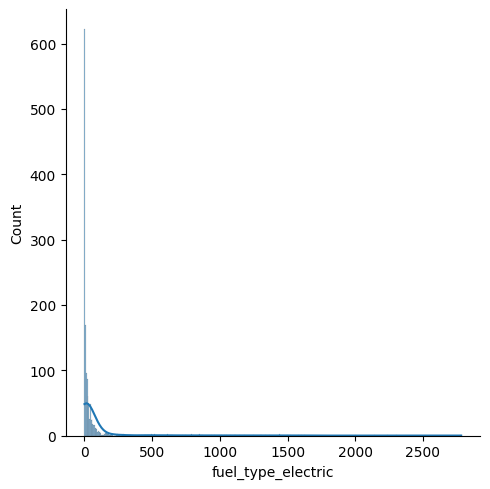

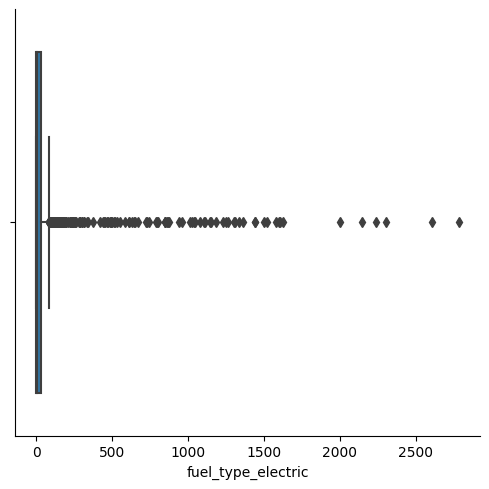

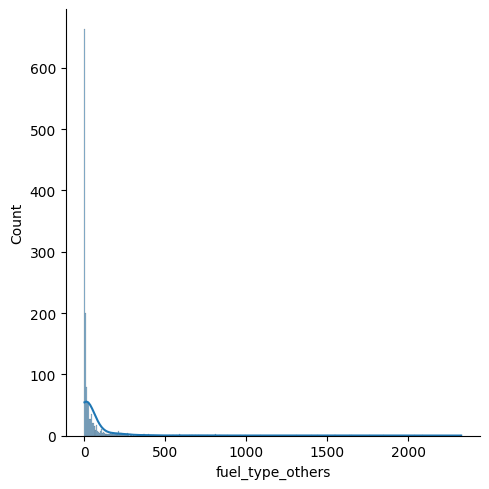

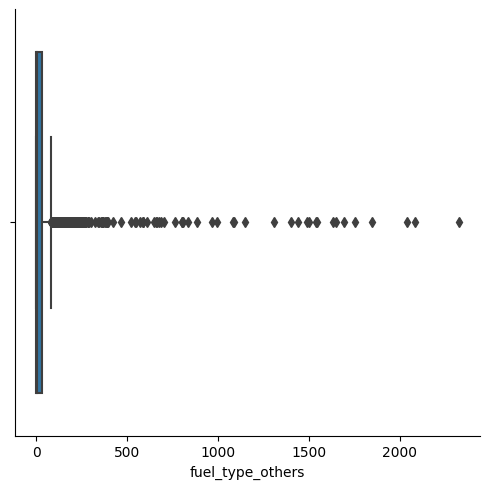

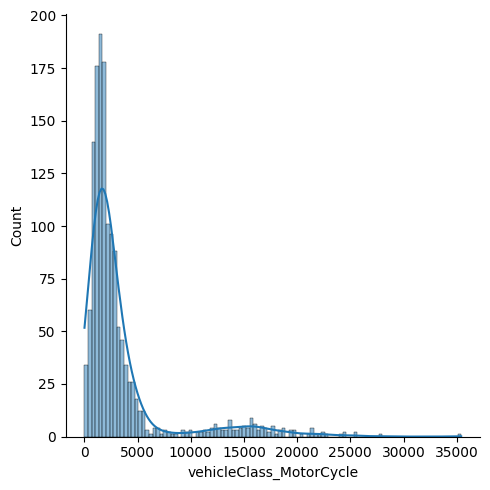

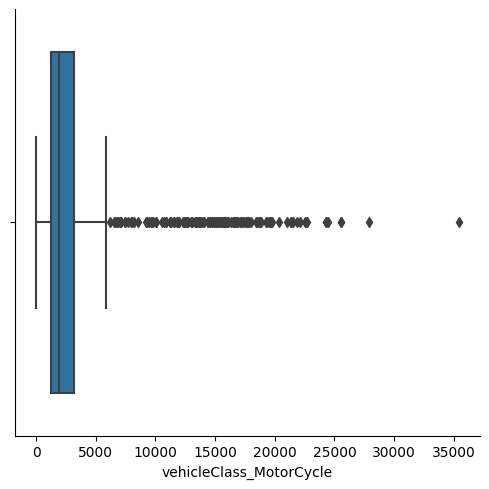

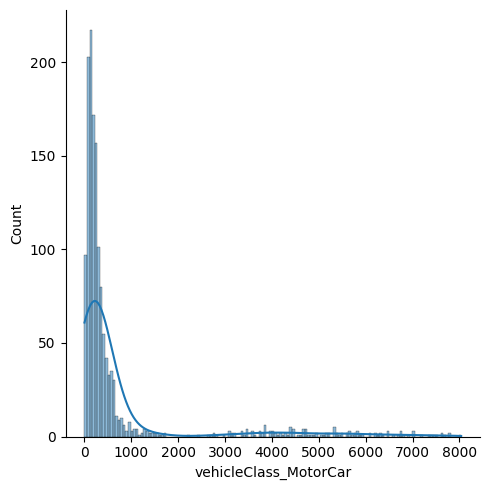

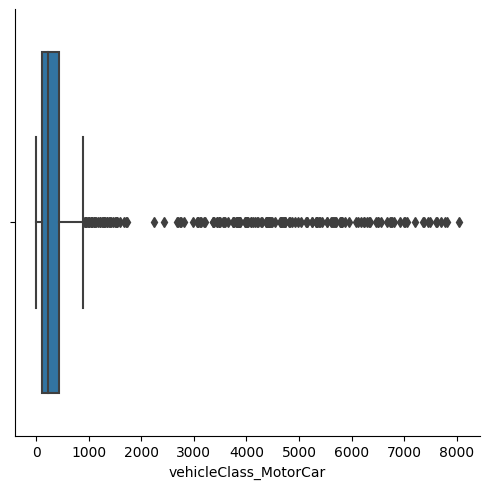

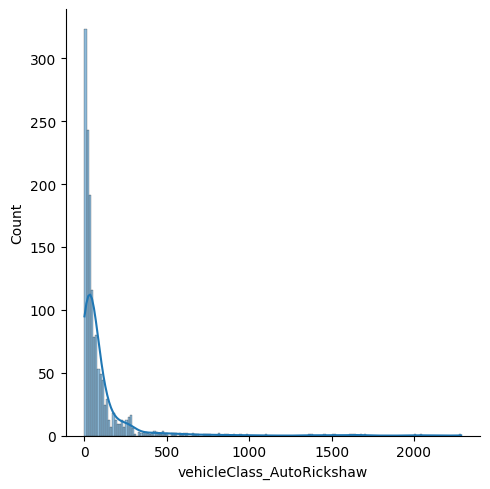

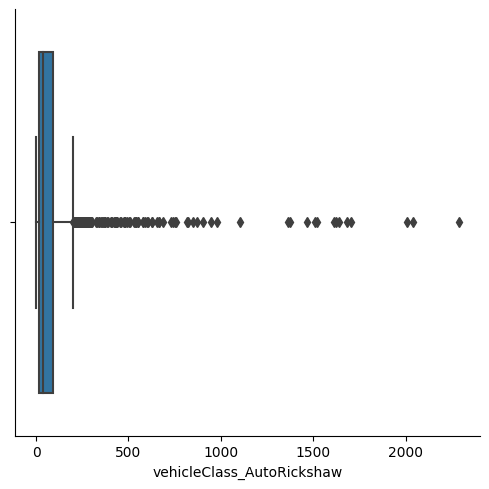

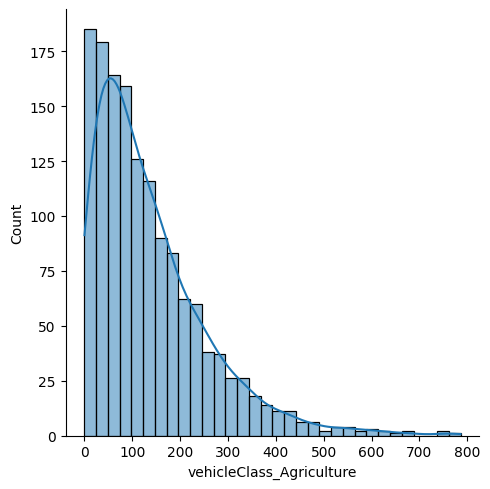

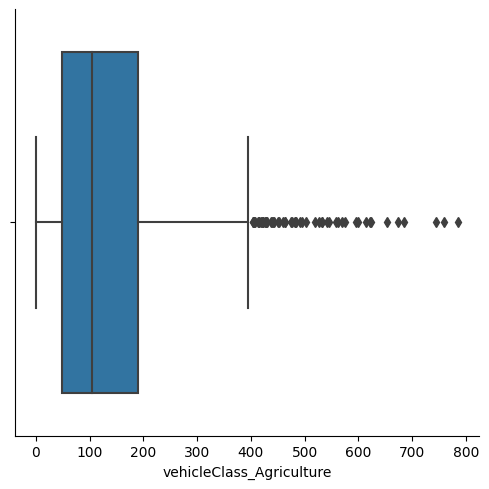

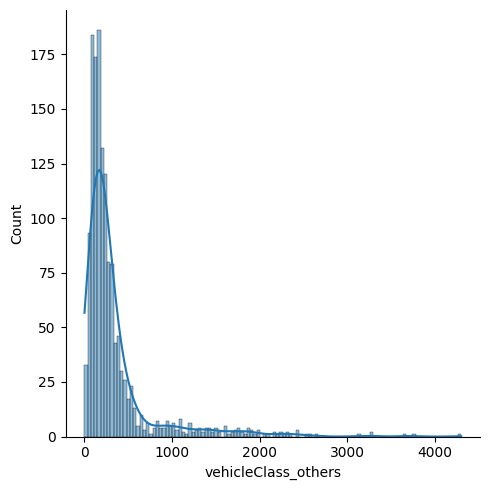

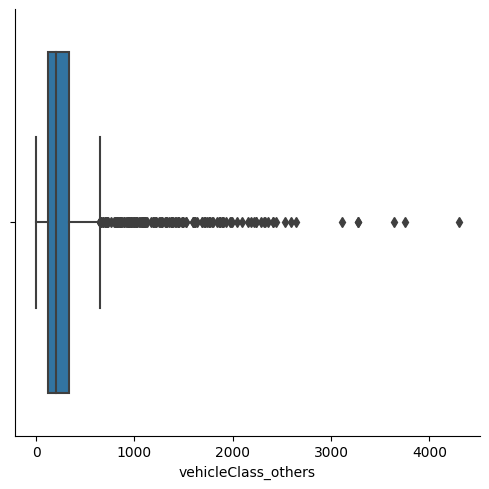

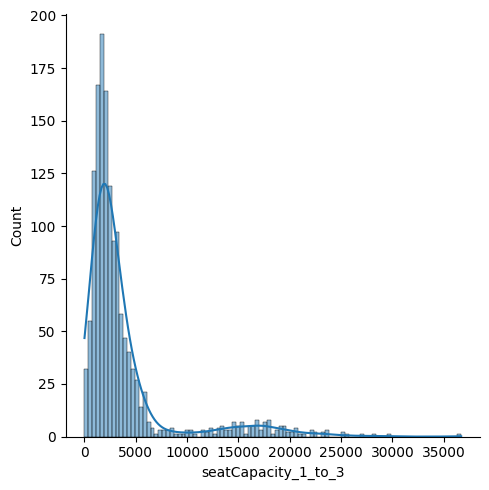

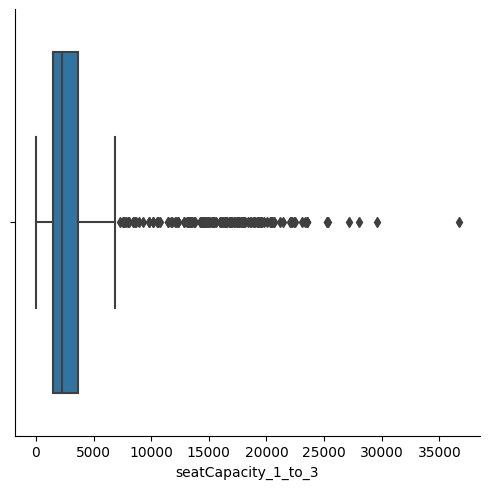

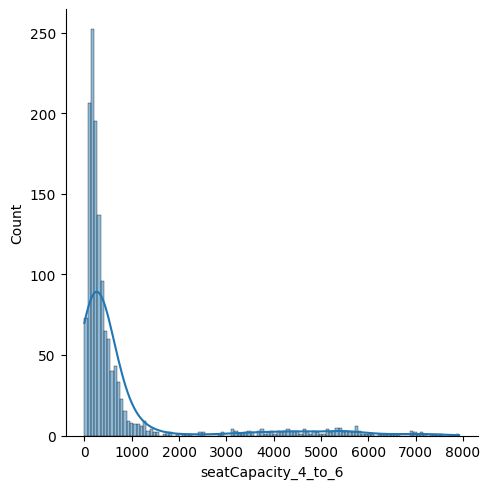

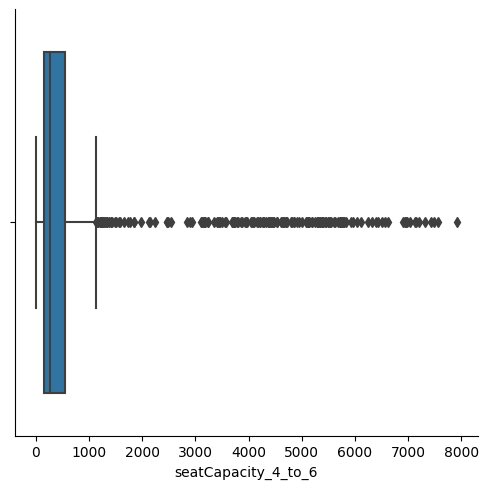

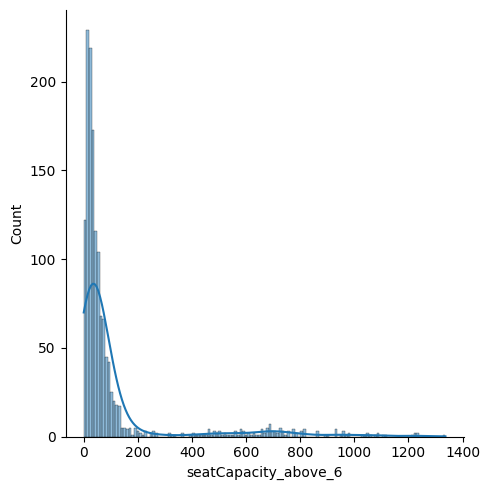

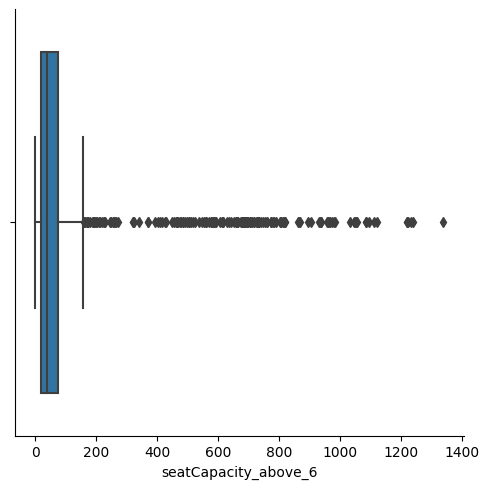

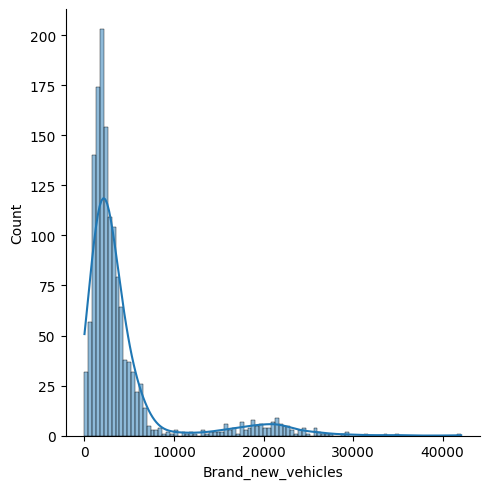

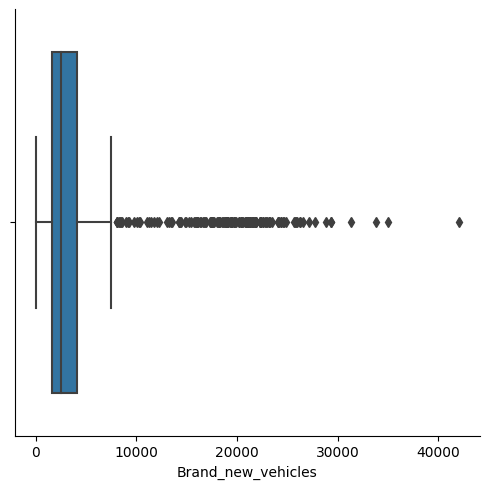

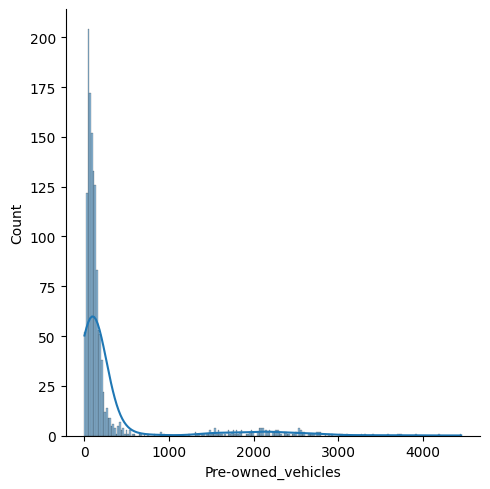

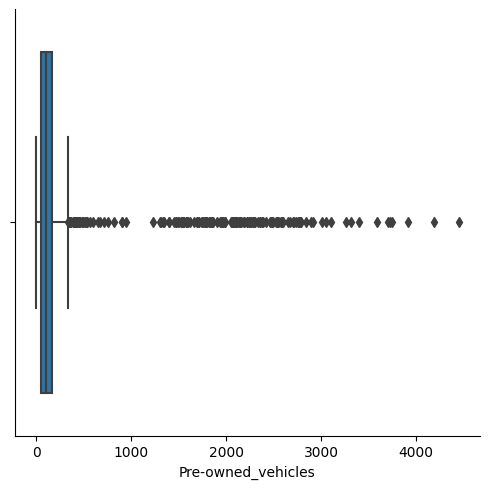

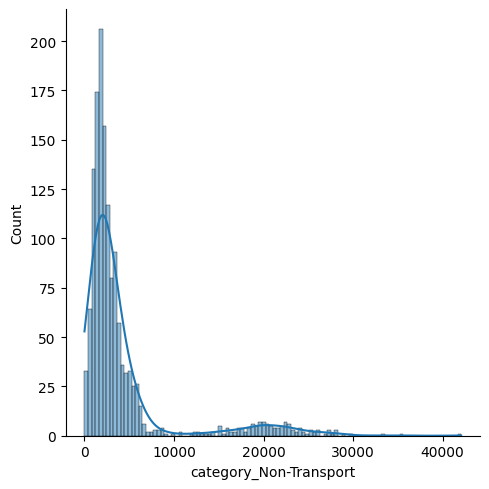

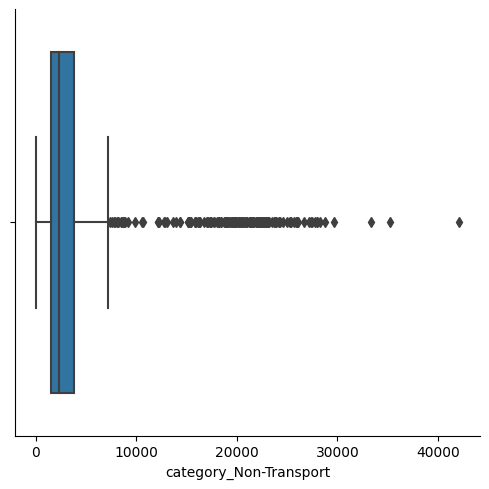

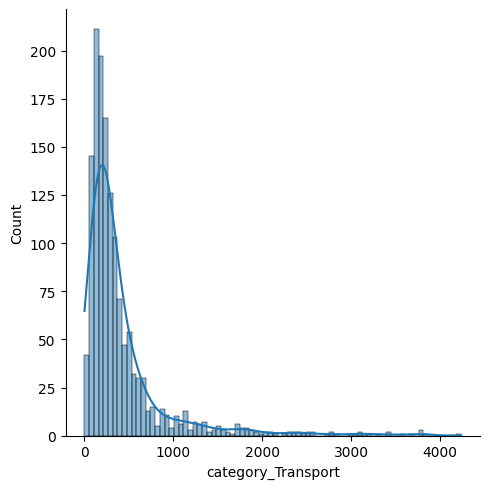

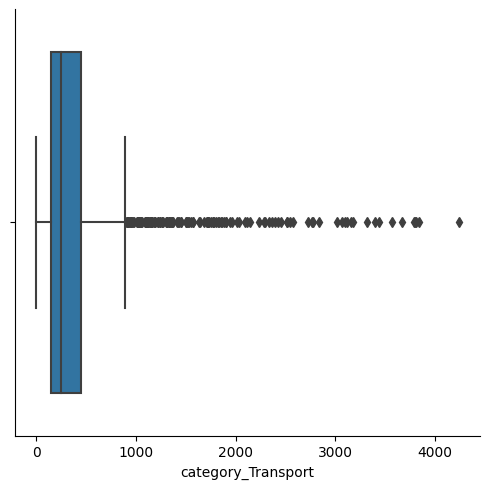

In [ ]:
for col in num_columns:
  plot_graphs(col)

#Stamps Registration

In [ ]:
#question 1
# How does the revenue generated from document registration vary across districts in Telangana?  List down the top 5 districts that showed
#the highest document registration revenue growth between FY 2019 and 2022.
stamps.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

In [ ]:
df=stamps.merge(districts,on="dist_code",how="left").merge(dates,on="month",how="left")
df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year  
0         2019  
1         2019  
2         2019  
3         2019  
4         2019

In [ ]:
#filtering the data on FY 2019 and 2022
temp_df=df[df["fiscal_year"].between(2019,2022)]
temp_df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year  
0         2019  
1         2019  
2         2019  
3         2019  
4         2019

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1482
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   dist_code                 1483 non-null   object        
 1   month                     1483 non-null   datetime64[ns]
 2   documents_registered_cnt  1483 non-null   int64         
 3   documents_registered_rev  1483 non-null   int64         
 4   estamps_challans_cnt      1483 non-null   int64         
 5   estamps_challans_rev      1483 non-null   int64         
 6   district                  1483 non-null   object        
 7   Mmm                       1483 non-null   object        
 8   quarter                   1483 non-null   object        
 9   fiscal_year               1483 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 127.4+ KB


In [ ]:
# Top 5 districts having more no. documents_registered_rev
top5_district_rev=temp_df.groupby("district")["documents_registered_rev"].sum().sort_values(ascending=False).head(5).reset_index()
top5_district_rev

district  documents_registered_rev
0          Rangareddy              108198682809
1  Medchal_Malkajgiri               64071382839
2           Hyderabad               38396743983
3          Sangareddy               22024502771
4         Hanumakonda                7927494100

In [ ]:
#question 2
#How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? List down the top 5 districts where e-stamps revenue contributes
#significantly more to the revenue than the documents in FY 2022?
temp_df=df[df["fiscal_year"]==2022]

In [ ]:
doc_vs_challans=temp_df.groupby("district")[["documents_registered_rev","estamps_challans_rev"]].sum().sort_values(by=["documents_registered_rev","estamps_challans_rev"],ascending=(False,False))

In [ ]:
doc_vs_challans[(doc_vs_challans["documents_registered_rev"])<(doc_vs_challans["estamps_challans_rev"])].head(5)

documents_registered_rev  estamps_challans_rev
district                                                           
Rangareddy                        37697750946           38349357618
Hyderabad                         14266012441           14374315032
Hanumakonda                        2817238587            2846856844
Yadadri Bhuvanagiri                2167480603            2185270667
Khammam                            1971647539            2002220314

In [ ]:
#question 3
#merging district ,dates and stamps
df=stamps.merge(districts,on="dist_code",how="left").merge(dates,on="month",how="left")
df.head()

dist_code      month  documents_registered_cnt  documents_registered_rev  \
0      14_1 2019-04-01                      4533                  59236363   
1      17_3 2019-04-01                      4151                  41508762   
2      20_3 2019-04-01                      2116                  23674170   
3      21_5 2019-04-01                      1089                  15915285   
4      23_1 2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev          district  Mmm quarter  \
0                     0                     0      Mahabubnagar  Apr      Q1   
1                     0                     0          Siddipet  Apr      Q1   
2                     0                     0  Rajanna Sircilla  Apr      Q1   
3                     0                     0       Mahabubabad  Apr      Q1   
4                     0                     0          Nalgonda  Apr      Q1   

   fiscal_year  
0         2019  
1         2019  
2         2019  
3         2019  
4         2019

In [ ]:
#bivariate analysis on estamp_challan_count and documents_registered_count
px.scatter(df,x="documents_registered_cnt",y="estamps_challans_cnt",hover_name="district")

In [ ]:
px.sunburst(df,path=["fiscal_year","quarter"],values="documents_registered_cnt",color="estamps_challans_cnt")

In [ ]:
temp_df=df.groupby('fiscal_year')['documents_registered_cnt','estamps_challans_cnt'].sum()
temp_df

<ipython-input-44-31f7f6e13019>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



documents_registered_cnt  estamps_challans_cnt
fiscal_year                                                
2019                          1614417                     0
2020                           943893                496132
2021                          1104580               1173978
2022                          1207073               1254961

In [ ]:
px.line(temp_df,x=temp_df.index,y=temp_df.columns)

In [ ]:
#question 4
pd.set_option('display.max_rows', None)
temp_df=df[(df['fiscal_year']==2021) | (df['fiscal_year']==2022)]
temp_df['estamps_challans_rev'].describe()

count          736.00
mean     261977179.39
std      647496958.06
min         723798.00
25%       26335671.50
50%       47498060.50
75%      122124759.75
max     4294273078.00
Name: estamps_challans_rev, dtype: float64

In [ ]:
percentile_25=temp_df['estamps_challans_rev'].quantile(0.25)
percentile_50=temp_df['estamps_challans_rev'].quantile(0.50)
percentile_75=temp_df['estamps_challans_rev'].quantile(0.75)

In [ ]:
#categorising and making a new column on the basis of estamp challans revenue
def district_cat(value):
  if value==np.nan:
    return np.nan
  elif value <= percentile_25:
    return "Low revenue"
  elif value > percentile_25 and value<= percentile_75:
    return "Medium revenue"
  else:
    return "High revenue"

In [ ]:
temp_df['estamp_rev_cat']=temp_df["estamps_challans_rev"].apply(district_cat)

<ipython-input-49-2d1a0fb4ae7f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
pd.crosstab(temp_df["district"],temp_df['estamp_rev_cat'])

estamp_rev_cat         High revenue  Low revenue  Medium revenue
district                                                        
Adilabad                          0            7              16
Bhadradri Kothagudem              0           16               7
Hanumakonda                      22            1               0
Hyderabad                        23            0               0
Jagtial                           0            2              21
Jangoan                           0            7              16
Jogulamba Gadwal                  0           13              10
Kamareddy                         0            3              20
Karimnagar                       11            1              11
Khammam                          22            0               1
Kumurambheem Asifabad             0           23               0
Mahabubabad                       0            8              15
Mahabubnagar                      1            1              21
Mancherial                        0            2              21
Medak                             0            4              19
Medchal_Malkajgiri               23            0               0
Mulugu                            0           23               0
Nagarkurnool                      0            3              20
Nalgonda                          6            1              16
Narayanpet                        0           20               3
Nirmal                            0            9              14
Nizamabad                        11            1              11
Peddapalli                        0            1              22
Rajanna Sircilla                  0            6              17
Rangareddy                       23            0               0
Sangareddy                       22            0               1
Siddipet                          0            1              22
Suryapet                          0            1              22
Vikarabad                         0            3              20
Wanaparthy                        0            5              18
Warangal                          0           22               1
Yadadri Bhuvanagiri              20            0               3

#Transportation
5. Investigate whether there is any correlation between vehicle sales and
specific months or seasons in different districts. Are there any months
or seasons that consistently show higher or lower sales rate, and if yes,
what could be the driving factors? (Consider Fuel-Type category only)
6. How does the distribution of vehicles vary by vehicle class
(MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different
districts? Are there any districts with a predominant preference for a
specific vehicle class? Consider FY 2022 for analysis.
7. List down the top 3 and bottom 3 districts that have shown the highest
and lowest vehicle sales growth during FY 2022 compared to FY
2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [ ]:
temp_transport=transport.merge(districts,on="dist_code",how="left").merge(dates,on="month",how="left")

In [ ]:
temp_transport.head()

dist_code      month  fuel_type_petrol  fuel_type_diesel  \
0      15_1 2019-04-01             17910              3011   
1      18_2 2019-04-01              3066               306   
2      20_3 2019-04-01              1577               215   
3      21_3 2019-04-01              1961               281   
4      21_7 2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   ...  seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
0  ...                 4182                   717               19542   
1  ...                  189                    33                3322   
2  ...                  104                     5                1751   
3  ...                  146                    16                2209   
4  ...                  145                    20                1820   

   Pre-owned_vehicles  category_Non-Transport  category_Transport  \
0                1477                   19856                1163   
1                  56                    3203                 175   
2                  41                    1648                 144   
3                  35                    2075                 169   
4                  41                    1701                 160   

                  district  Mmm quarter fiscal_year  
0               Rangareddy  Apr      Q1        2019  
1                Kamareddy  Apr      Q1        2019  
2         Rajanna Sircilla  Apr      Q1        2019  
3                  Jangoan  Apr      Q1        2019  
4  Jayashankar Bhupalpally  Apr      Q1        2019  

[5 rows x 22 columns]

In [ ]:
temp_transport.groupby(['fiscal_year','Mmm','district'])[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric','fuel_type_others']].sum().sort_index().sort_values(by=['fuel_type_petrol','fuel_type_diesel','fuel_type_electric','fuel_type_others'],ascending=(False,False,False,False))

fuel_type_petrol  fuel_type_diesel  \
fiscal_year Mmm district                                                      
2019        Oct Hyderabad                           39689              4059   
                Medchal_Malkajgiri                  32104              5270   
                Rangareddy                          31646              4665   
            Jun Hyderabad                           28578              3210   
            Nov Hyderabad                           26996              3008   
            Aug Hyderabad                           26643              2880   
            Jul Hyderabad                           26435              2937   
2020        Nov Hyderabad                           26280              1799   
2021        Oct Hyderabad                           26093              1690   
2020        Oct Hyderabad                           25950              1943   
                Medchal_Malkajgiri                  25090              2651   
2019        May Hyderabad                           24949              3035   
2022        Aug Hyderabad                           24384              2114   
2019        Apr Hyderabad                           24309              2957   
2022        Mar Hyderabad                           24112              2169   
2020        Nov Medchal_Malkajgiri                  23989              2296   
2021        Nov Hyderabad                           23949              1676   
2022        Jun Hyderabad                           23776              2243   
2019        Feb Hyderabad                           23567              3153   
2021        Oct Medchal_Malkajgiri                  23462              2559   
2020        Mar Hyderabad                           23339              2282   
            Feb Hyderabad                           23111              1793   
2022        Sep Hyderabad                           23069              2104   
2019        Nov Medchal_Malkajgiri                  22203              3672   
2020        Jan Hyderabad                           21635              1702   
            Oct Rangareddy                          21573              2165   
2022        Jul Hyderabad                           21496              2226   
2019        Jan Hyderabad                           21294              2869   
2022        Aug Rangareddy                          21234              2934   
2021        Mar Hyderabad                           21162              2447   
2022        Mar Rangareddy                          21146              3017   
            Jun Rangareddy                          21087              3187   
2019        Nov Rangareddy                          21086              3326   
2020        Dec Hyderabad                           21040              1702   
2021        Oct Rangareddy                          20888              2089   
2022        Jan Hyderabad                           20869              1488   
2019        Dec Hyderabad                           20837              3441   
2022        Mar Medchal_Malkajgiri                  20794              2944   
2021        Dec Hyderabad                           20590              2091   
            Nov Medchal_Malkajgiri                  20585              1998   
2022        May Hyderabad                           20544              1614   
2020        Mar Medchal_Malkajgiri                  20517              2833   
2022        Jun Medchal_Malkajgiri                  20400              3045   
            Aug Medchal_Malkajgiri                  20361              2840   
            Sep Rangareddy                          20345              3014   
            Apr Hyderabad                           20341              2013   
2020        Nov Rangareddy                          20323              1901   
2019        Sep Hyderabad                           20236              2476   
            Jun Medchal_Malkajgiri                  20110              3961   
2021        

In [ ]:
pd.set_option('display.max_columns', None)
temp_df=temp_transport[temp_transport["fiscal_year"]==2022]
temp_df.head()

dist_code      month  fuel_type_petrol  fuel_type_diesel  \
1080      14_4 2022-04-01               936               312   
1081      21_7 2022-04-01              1291               211   
1082      14_1 2022-04-01              2185               433   
1083      17_3 2022-04-01              2034               521   
1084      14_3 2022-04-01              1489               383   

      fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
1080                  16                 2                      872   
1081                  34                 2                     1211   
1082                  55                 8                     2004   
1083                  44                38                     1834   
1084                  24                 4                     1356   

      vehicleClass_MotorCar  vehicleClass_AutoRickshaw  \
1080                    106                         10   
1081                    127                         16   
1082                    283                         26   
1083                    311                         22   
1084                    184                         11   

      vehicleClass_Agriculture  vehicleClass_others  seatCapacity_1_to_3  \
1080                        50                  228                 1148   
1081                       129                   55                 1388   
1082                        74                  294                 2341   
1083                       213                  257                 2269   
1084                        88                  261                 1656   

      seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
1080                  104                    14                1230   
1081                  132                    18                1481   
1082                  301                    39                2538   
1083                  316                    52                2518   
1084                  219                    25                1836   

      Pre-owned_vehicles  category_Non-Transport  category_Transport  \
1080                  36                    1038                 228   
1081                  57                    1469                  69   
1082                 143                    2375                 306   
1083                 119                    2363                 274   
1084                  64                    1634                 266   

                     district  Mmm quarter  fiscal_year  
1080               Wanaparthy  Apr      Q1         2022  
1081  Jayashankar Bhupalpally  Apr      Q1         2022  
1082             Mahabubnagar  Apr      Q1         2022  
1083                 Siddipet  Apr      Q1         2022  
1084             Nagarkurnool  Apr      Q1         2022

In [ ]:
temp_df.groupby("district")[['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','vehicleClass_others']].sum().sort_values(by=['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','vehicleClass_others'],ascending=(False,False,False,False,False))

vehicleClass_MotorCycle  vehicleClass_MotorCar  \
district                                                                  
Hyderabad                                 206819                  51447   
Medchal_Malkajgiri                        164626                  61071   
Rangareddy                                154186                  71832   
Sangareddy                                 40784                  14565   
Nizamabad                                  28105                   5824   
Nalgonda                                   27942                   4927   
Khammam                                    27385                   5880   
Vikarabad                                  23116                   5211   
Karimnagar                                 19411                   4818   
Suryapet                                   19165                   3038   
Mahabubnagar                               17977                   3300   
Warangal                                   17770                   2937   
Siddipet                                   17401                   3254   
Bhadradri Kothagudem                       17022                   3157   
Kamareddy                                  15184                   2153   
Yadadri Bhuvanagiri                        14471                   3216   
Jagtial                                    13639                   2055   
Nagarkurnool                               12229                   2066   
Medak                                      11663                   2347   
Mancherial                                 11603                   2218   
Mahabubabad                                11046                   1155   
Nirmal                                     10984                   1581   
Peddapalli                                 10818                   2205   
Adilabad                                   10410                   1416   
Jogulamba Gadwal                           10300                    899   
Jayashankar Bhupalpally                     9225                   1343   
Wanaparthy                                  8771                   1194   
Jangoan                                     8617                   1177   
Rajanna Sircilla                            8007                   1376   
Kumurambheem Asifabad                       6433                    479   

                         vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
district                                                                       
Hyderabad                                     8397                        20   
Medchal_Malkajgiri                              83                       261   
Rangareddy                                      69                       449   
Sangareddy                                    3381                      1570   
Nizamabad                                     1011                      1181   
Nalgonda                                       964                      2599   
Khammam                                       2690                      2121   
Vikarabad                                     2046                      1814   
Karimnagar                                    1042                       999   
Suryapet                                       739                      2188   
Mahabubnagar                                  1130                       937   
Warangal                                      1331                       681   
Siddipet                                       524                      2437   
Bhadradri Kothagudem                          1388                      2013   
Kamareddy                                      379                       748   
Yadadri Bhuvanagiri                            465                      1853   
Jagtial                                        272                       858   
Nagarkurnool                                   366                      1556   
Medak                   

In [ ]:
temp_df=temp_transport[(temp_transport["fiscal_year"]==2022) | (temp_transport["fiscal_year"]==2021)]
temp_df.head()


dist_code      month  fuel_type_petrol  fuel_type_diesel  \
720      21_3 2021-04-01               990               285   
721      21_7 2021-04-01              1750               360   
722      14_1 2021-04-01              3301               661   
723      17_3 2021-04-01              1893               474   
724      14_3 2021-04-01              1718               539   

     fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
720                   0                 2                      856   
721                  10                 0                     1578   
722                  19                 2                     2996   
723                   6                30                     1698   
724                   2                 0                     1582   

     vehicleClass_MotorCar  vehicleClass_AutoRickshaw  \
720                    142                          8   
721                    191                         20   
722                    380                         44   
723                    255                         30   
724                    170                         24   

     vehicleClass_Agriculture  vehicleClass_others  seatCapacity_1_to_3  \
720                       191                   80                 1123   
721                       241                   90                 1896   
722                       253                  310                 3531   
723                       297                  123                 2106   
724                       241                  242                 2061   

     seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
720                  142                    12                1233   
721                  203                    21                2059   
722                  395                    57                3838   
723                  262                    35                2331   
724                  174                    24                2175   

     Pre-owned_vehicles  category_Non-Transport  category_Transport  \
720                  44                    1198                  79   
721                  61                    2016                 104   
722                 145                    3633                 350   
723                  72                    2261                 142   
724                  84                    1997                 262   

                    district  Mmm quarter  fiscal_year  
720                  Jangoan  Apr      Q1         2021  
721  Jayashankar Bhupalpally  Apr      Q1         2021  
722             Mahabubnagar  Apr      Q1         2021  
723                 Siddipet  Apr      Q1         2021  
724             Nagarkurnool  Apr      Q1         2021

In [ ]:
aggregated_df=temp_df.groupby(['district', 'fiscal_year']).agg({
    'fuel_type_petrol': 'sum',
    'fuel_type_diesel': 'sum',
    'fuel_type_electric': 'sum'
}).reset_index()

In [ ]:
aggregated_df

district  fiscal_year  fuel_type_petrol  fuel_type_diesel  \
0                  Adilabad         2021             16592              2267   
1                  Adilabad         2022             11212              2523   
2      Bhadradri Kothagudem         2021             27650              5739   
3      Bhadradri Kothagudem         2022             19331              5712   
4                 Hyderabad         2021            228817             21195   
5                 Hyderabad         2022            231166             20019   
6                   Jagtial         2021             24945              2872   
7                   Jagtial         2022             14836              2261   
8                   Jangoan         2021             13843              3155   
9                   Jangoan         2022              9520              2461   
10  Jayashankar Bhupalpally         2021             15788              3904   
11  Jayashankar Bhupalpally         2022             10274              3169   
12         Jogulamba Gadwal         2021             14239              2309   
13         Jogulamba Gadwal         2022             10911              2336   
14                Kamareddy         2021             26055              3001   
15                Kamareddy         2022             17043              3225   
16               Karimnagar         2021             29074              5034   
17               Karimnagar         2022             24574             10644   
18                  Khammam         2021             42127              8058   
19                  Khammam         2022             31233              8030   
20    Kumurambheem Asifabad         2021             10112              1834   
21    Kumurambheem Asifabad         2022              6779              1723   
22              Mahabubabad         2021             18857              4187   
23              Mahabubabad         2022             12053              3170   
24             Mahabubnagar         2021             31344              6029   
25             Mahabubnagar         2022             20274              4790   
26               Mancherial         2021             18852              3186   
27               Mancherial         2022             13295              2891   
28                    Medak         2021             18208              4378   
29                    Medak         2022             13218              4077   
30       Medchal_Malkajgiri         2021            201947             27153   
31       Medchal_Malkajgiri         2022            200121             27592   
32             Nagarkurnool         2021             19215              5964   
33             Nagarkurnool         2022             14210              5167   
34                 Nalgonda         2021             41243              9212   
35                 Nalgonda         2022             31574              7840   
36                   Nirmal         2021             19746              2613   
37                   Nirmal         2022             11640              2576   
38                Nizamabad         2021             47611              5718   
39                Nizamabad         2022             31314              5337   
40               Peddapalli         2021             17872              3185   
41               Peddapalli         2022             12308              2507   
42         Rajanna Sircilla         2021             14287              2219   
43         Rajanna Sircilla         2022              8743              1954   
44               Rangareddy         2021            184204             24711   
45               Rangareddy         2022            200289             27843   
46               Sangareddy         2021             53583              8193   
47               Sangareddy         2022             49507              9275   
48                 Siddipet         2021             27173              5439   
49                 

In [ ]:
pivot_df = aggregated_df.pivot(index='district', columns='fiscal_year')
pivot_df

fuel_type_petrol         fuel_type_diesel         \
fiscal_year                         2021    2022             2021   2022   
district                                                                   
Adilabad                           16592   11212             2267   2523   
Bhadradri Kothagudem               27650   19331             5739   5712   
Hyderabad                         228817  231166            21195  20019   
Jagtial                            24945   14836             2872   2261   
Jangoan                            13843    9520             3155   2461   
Jayashankar Bhupalpally            15788   10274             3904   3169   
Jogulamba Gadwal                   14239   10911             2309   2336   
Kamareddy                          26055   17043             3001   3225   
Karimnagar                         29074   24574             5034  10644   
Khammam                            42127   31233             8058   8030   
Kumurambheem Asifabad              10112    6779             1834   1723   
Mahabubabad                        18857   12053             4187   3170   
Mahabubnagar                       31344   20274             6029   4790   
Mancherial                         18852   13295             3186   2891   
Medak                              18208   13218             4378   4077   
Medchal_Malkajgiri                201947  200121            27153  27592   
Nagarkurnool                       19215   14210             5964   5167   
Nalgonda                           41243   31574             9212   7840   
Nirmal                             19746   11640             2613   2576   
Nizamabad                          47611   31314             5718   5337   
Peddapalli                         17872   12308             3185   2507   
Rajanna Sircilla                   14287    8743             2219   1954   
Rangareddy                        184204  200289            24711  27843   
Sangareddy                         53583   49507             8193   9275   
Siddipet                           27173   19150             5439   4968   
Suryapet                           28315   21145             8059   7337   
Vikarabad                          37097   26821             6451   6155   
Wanaparthy                         13584    9641             2686   2745   
Warangal                           36035   19704             5717   2971   
Yadadri Bhuvanagiri                22308   16971             4878   4805   

                        fuel_type_electric         
fiscal_year                           2021   2022  
district                                           
Adilabad                               277    333  
Bhadradri Kothagudem                    76    290  
Hyderabad                             8929  20026  
Jagtial                                409    642  
Jangoan                                 73    179  
Jayashankar Bhupalpally                111    227  
Jogulamba Gadwal                        52     84  
Kamareddy                              183    273  
Karimnagar                             704   1132  
Khammam                                149    759  
Kumurambheem Asifabad                   34     81  
Mahabubabad                             36    101  
Mahabubnagar                           324    387  
Mancherial                             198    236  
Medak                                  185    319  
Medchal_Malkajgiri                    7086  13716  
Nagarkurnool                           105    171  
Nalgonda                               395    555  
Nirmal                                 355    672  
Nizamabad                             1451   1800  
Peddapalli                             219    404  
Rajanna Sircilla                       362    416  
Rangareddy                            5918  13606  
Sangareddy                            1558   3039  
Siddipet                               445    773  
Suryapet                               193    670  
Vikarab

In [ ]:
sales_growth = ((pivot_df[('fuel_type_petrol', 2022)] - pivot_df[('fuel_type_petrol', 2021)]) / pivot_df[('fuel_type_petrol', 2021)] * 100).round(2)
diesel_growth = ((pivot_df[('fuel_type_diesel', 2022)] - pivot_df[('fuel_type_diesel', 2021)]) / pivot_df[('fuel_type_diesel', 2021)] * 100).round(2)
electric_growth = ((pivot_df[('fuel_type_electric', 2022)] - pivot_df[('fuel_type_electric', 2021)]) / pivot_df[('fuel_type_electric', 2021)] * 100).round(2)


In [ ]:
sales_growth_df = pd.DataFrame({
    'District': sales_growth.index,
    'Petrol Sales Growth (%)': sales_growth.values,
    'Diesel Sales Growth (%)': diesel_growth.values,
    'Electric Sales Growth (%)': electric_growth.values
})


In [ ]:
sales_growth_df

District  Petrol Sales Growth (%)  Diesel Sales Growth (%)  \
0                  Adilabad                   -32.43                    11.29   
1      Bhadradri Kothagudem                   -30.09                    -0.47   
2                 Hyderabad                     1.03                    -5.55   
3                   Jagtial                   -40.53                   -21.27   
4                   Jangoan                   -31.23                   -22.00   
5   Jayashankar Bhupalpally                   -34.93                   -18.83   
6          Jogulamba Gadwal                   -23.37                     1.17   
7                 Kamareddy                   -34.59                     7.46   
8                Karimnagar                   -15.48                   111.44   
9                   Khammam                   -25.86                    -0.35   
10    Kumurambheem Asifabad                   -32.96                    -6.05   
11              Mahabubabad                   -36.08                   -24.29   
12             Mahabubnagar                   -35.32                   -20.55   
13               Mancherial                   -29.48                    -9.26   
14                    Medak                   -27.41                    -6.88   
15       Medchal_Malkajgiri                    -0.90                     1.62   
16             Nagarkurnool                   -26.05                   -13.36   
17                 Nalgonda                   -23.44                   -14.89   
18                   Nirmal                   -41.05                    -1.42   
19                Nizamabad                   -34.23                    -6.66   
20               Peddapalli                   -31.13                   -21.29   
21         Rajanna Sircilla                   -38.80                   -11.94   
22               Rangareddy                     8.73                    12.67   
23               Sangareddy                    -7.61                    13.21   
24                 Siddipet                   -29.53                    -8.66   
25                 Suryapet                   -25.32                    -8.96   
26                Vikarabad                   -27.70                    -4.59   
27               Wanaparthy                   -29.03                     2.20   
28                 Warangal                   -45.32                   -48.03   
29      Yadadri Bhuvanagiri                   -23.92                    -1.50   

    Electric Sales Growth (%)  
0                       20.22  
1                      281.58  
2                      124.28  
3                       56.97  
4                      145.21  
5                      104.50  
6                       61.54  
7                       49.18  
8                       60.80  
9                      409.40  
10                     138.24  
11                     180.56  
12                      19.44  
13                      19.19  
14                      72.43  
15                      93.56  
16                      62.86  
17                      40.51  
18                      89.30  
19                      24.05  
20                      84.47  
21                      14.92  
22                     129.91  
23                      95.06  
24                      73.71  
25                     247.15  
26                      46.48  
27                       5.48  
28                      54.89  
29                      20.96

#Ts-Ipass (Telangana State Industrial Project Approval and Self Certification System)
8. List down the top 5 sectors that have witnessed the most significant
investments in FY 2022.
9. List down the top 3 districts that have attracted the most significant
sector investments during FY 2019 to 2022? What factors could have
led to the substantial investments in these particular districts?
10. Is there any relationship between district investments, vehicles
 sales and stamps revenue within the same district between FY 2021
 and 2022?
11. Are there any particular sectors that have shown substantial
 investment in multiple districts between FY 2021 and 2022?
12. Can we identify any seasonal patterns or cyclicality in the
 investment trends for specific sectors? Do certain sectors
 experience higher investments during particular months?


In [ ]:
#question 8
temp_df=ts_ipass.merge(dates,on="month",how="left").merge(districts,on="dist_code",how="left")
temp_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-01-04                         Engineering              2.32   
1      19_1 2019-01-04                         Engineering              0.62   
2      20_3 2019-01-04                    Wood and Leather              0.20   
3      20_3 2019-01-04                            Textiles              0.27   
4      21_5 2019-01-04  Electrical and Electronic Products              0.12   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  NaN     NaN          NaN      Mahabubnagar  
1                   13  NaN     NaN          NaN          Adilabad  
2                    8  NaN     NaN          NaN  Rajanna Sircilla  
3                   27  NaN     NaN          NaN  Rajanna Sircilla  
4                    5  NaN     NaN          NaN       Mahabubabad

In [ ]:
temp_df1=temp_df.groupby(["sector","fiscal_year"])["investment in cr"].sum().sort_index(ascending=False).reset_index()

In [ ]:
temp_df1[temp_df1["fiscal_year"]==2022].sort_values(by='investment in cr',ascending=False).head(5)

sector  fiscal_year  investment in cr
17                  Plastic and Rubber      2022.00           1599.14
61                          Automobile      2022.00           1254.27
49  Electrical and Electronic Products      2022.00            218.83
13                                 R&D      2022.00            208.87
29                              Others      2022.00            190.88

In [ ]:
temp_df2=temp_df.groupby("district")["investment in cr"].sum().sort_values(ascending=False).reset_index().head(5)
temp_df2

district  investment in cr
0          Rangareddy          42706.33
1          Sangareddy          12366.76
2  Medchal_Malkajgiri          10394.56
3          Peddapalli           5715.39
4        Mahabubnagar           4771.89

In [ ]:
temp_df.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-01-04                         Engineering              2.32   
1      19_1 2019-01-04                         Engineering              0.62   
2      20_3 2019-01-04                    Wood and Leather              0.20   
3      20_3 2019-01-04                            Textiles              0.27   
4      21_5 2019-01-04  Electrical and Electronic Products              0.12   

   number_of_employees  Mmm quarter  fiscal_year          district  
0                   15  NaN     NaN          NaN      Mahabubnagar  
1                   13  NaN     NaN          NaN          Adilabad  
2                    8  NaN     NaN          NaN  Rajanna Sircilla  
3                   27  NaN     NaN          NaN  Rajanna Sircilla  
4                    5  NaN     NaN          NaN       Mahabubabad

In [ ]:
#question 9
temp_df.groupby("district")["investment in cr"].sum().reset_index().sort_values(by=("investment in cr"),ascending=False)

district  investment in cr
25               Rangareddy          42706.33
26               Sangareddy          12366.76
16       Medchal_Malkajgiri          10394.56
23               Peddapalli           5715.39
13             Mahabubnagar           4771.89
32      Yadadri Bhuvanagiri           3499.88
15                    Medak           3224.02
27                 Siddipet           2047.25
1      Bhadradri Kothagudem           2028.50
28                 Suryapet           2028.43
8                 Kamareddy           1937.06
19                 Nalgonda           1901.43
20               Narayanpet           1615.68
10                  Khammam            786.15
30               Wanaparthy            559.80
31                 Warangal            510.32
9                Karimnagar            425.09
14               Mancherial            385.50
18             Nagarkurnool            359.60
29                Vikarabad            303.99
22                Nizamabad            219.05
2               Hanumakonda            196.67
12              Mahabubabad            179.10
4                   Jagtial            169.45
5                   Jangoan            158.41
24         Rajanna Sircilla            147.77
7          Jogulamba Gadwal            138.03
11    Kumurambheem Asifabad             98.79
21                   Nirmal             92.73
3                 Hyderabad             55.80
0                  Adilabad             40.09
6   Jayashankar Bhupalpally             35.92
17                   Mulugu             34.01

In [ ]:
#to answer the what of question 10
temp_df.groupby(["district","sector"])["investment in cr"].sum().reset_index().sort_values(by=("investment in cr"),ascending=False)

district  \
335               Rangareddy   
299               Peddapalli   
333               Rangareddy   
219       Medchal_Malkajgiri   
350               Sangareddy   
351               Sangareddy   
435      Yadadri Bhuvanagiri   
20      Bhadradri Kothagudem   
221       Medchal_Malkajgiri   
325               Rangareddy   
332               Rangareddy   
174             Mahabubnagar   
261               Narayanpet   
374                 Suryapet   
340               Sangareddy   
337               Rangareddy   
171             Mahabubnagar   
103                Kamareddy   
196                    Medak   
255                 Nalgonda   
213       Medchal_Malkajgiri   
205                    Medak   
222       Medchal_Malkajgiri   
439      Yadadri Bhuvanagiri   
202                    Medak   
357                 Siddipet   
352               Sangareddy   
341               Sangareddy   
330               Rangareddy   
328               Rangareddy   
344               Sangareddy   
220       Medchal_Malkajgiri   
366                 Siddipet   
217       Medchal_Malkajgiri   
101                Kamareddy   
173             Mahabubnagar   
208       Medchal_Malkajgiri   
346               Sangareddy   
215       Medchal_Malkajgiri   
348               Sangareddy   
251                 Nalgonda   
334               Rangareddy   
381                 Suryapet   
331               Rangareddy   
362                 Siddipet   
323               Rangareddy   
253                 Nalgonda   
343               Sangareddy   
302               Peddapalli   
402               Wanaparthy   
172             Mahabubnagar   
189               Mancherial   
329               Rangareddy   
169             Mahabubnagar   
321               Rangareddy   
324               Rangareddy   
327               Rangareddy   
336               Rangareddy   
429      Yadadri Bhuvanagiri   
127                  Khammam   
216       Medchal_Malkajgiri   
354               Sangareddy   
168             Mahabubnagar   
111               Karimnagar   
167             Mahabubnagar   
97                 Kamareddy   
218       Medchal_Malkajgiri   
212       Medchal_Malkajgiri   
198                    Medak   
422                 Warangal   
119                  Khammam   
347               Sangareddy   
237             Nagarkurnool   
349               Sangareddy   
431      Yadadri Bhuvanagiri   
408               Wanaparthy   
125                  Khammam   
288                Nizamabad   
421                 Warangal   
126                  Khammam   
152              Mahabubabad   
243             Nagarkurnool   
37               Hanumakonda   
53                   Jagtial   
66                   Jangoan   
165             Mahabubnagar   
404               Wanaparthy   
368                 Siddipet   
345               Sangareddy   
415                 Warangal   
200                    Medak   
342               Sangareddy   
384                 Suryapet   
120                  Khammam   
224       Medchal_Malkajgiri   
193                    Medak   
203                    Medak   
339               Sangareddy   
320               Rangareddy   
91          Jogulamba Gadwal   
436      Yadadri Bhuvanagiri   
192                    Medak   
195                    Medak   
161             Mahabubnagar   
175             Mahabubnagar   
211       Medchal_Malkajgiri   
142    Kumurambheem Asifabad   
312         Rajanna Sircilla   
360                 Siddipet   
260               Narayanpet   
244             Nagarkurnool   
434      Yadadri Bhuvanagiri   
389                Vikarabad   
378                 Suryapet   
112               Karimnagar   
416                 Warangal   
365                 Siddipet   
391                Vikarabad   
387                Vikarabad   
395                Vikarabad   
262               Narayanpet   
364                 Siddipet   
355               Sangareddy   
274                   Nirmal   
430      Yadadri Bhu

In [ ]:
ts_ipass.head()

dist_code      month                              sector  investment in cr  \
0      14_1 2019-01-04                         Engineering              2.32   
1      19_1 2019-01-04                         Engineering              0.62   
2      20_3 2019-01-04                    Wood and Leather              0.20   
3      20_3 2019-01-04                            Textiles              0.27   
4      21_5 2019-01-04  Electrical and Electronic Products              0.12   

   number_of_employees  
0                   15  
1                   13  
2                    8  
3                   27  
4                    5

<ipython-input-12-30a5a1629a57>:1: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<ipython-input-12-30a5a1629a57>:1: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



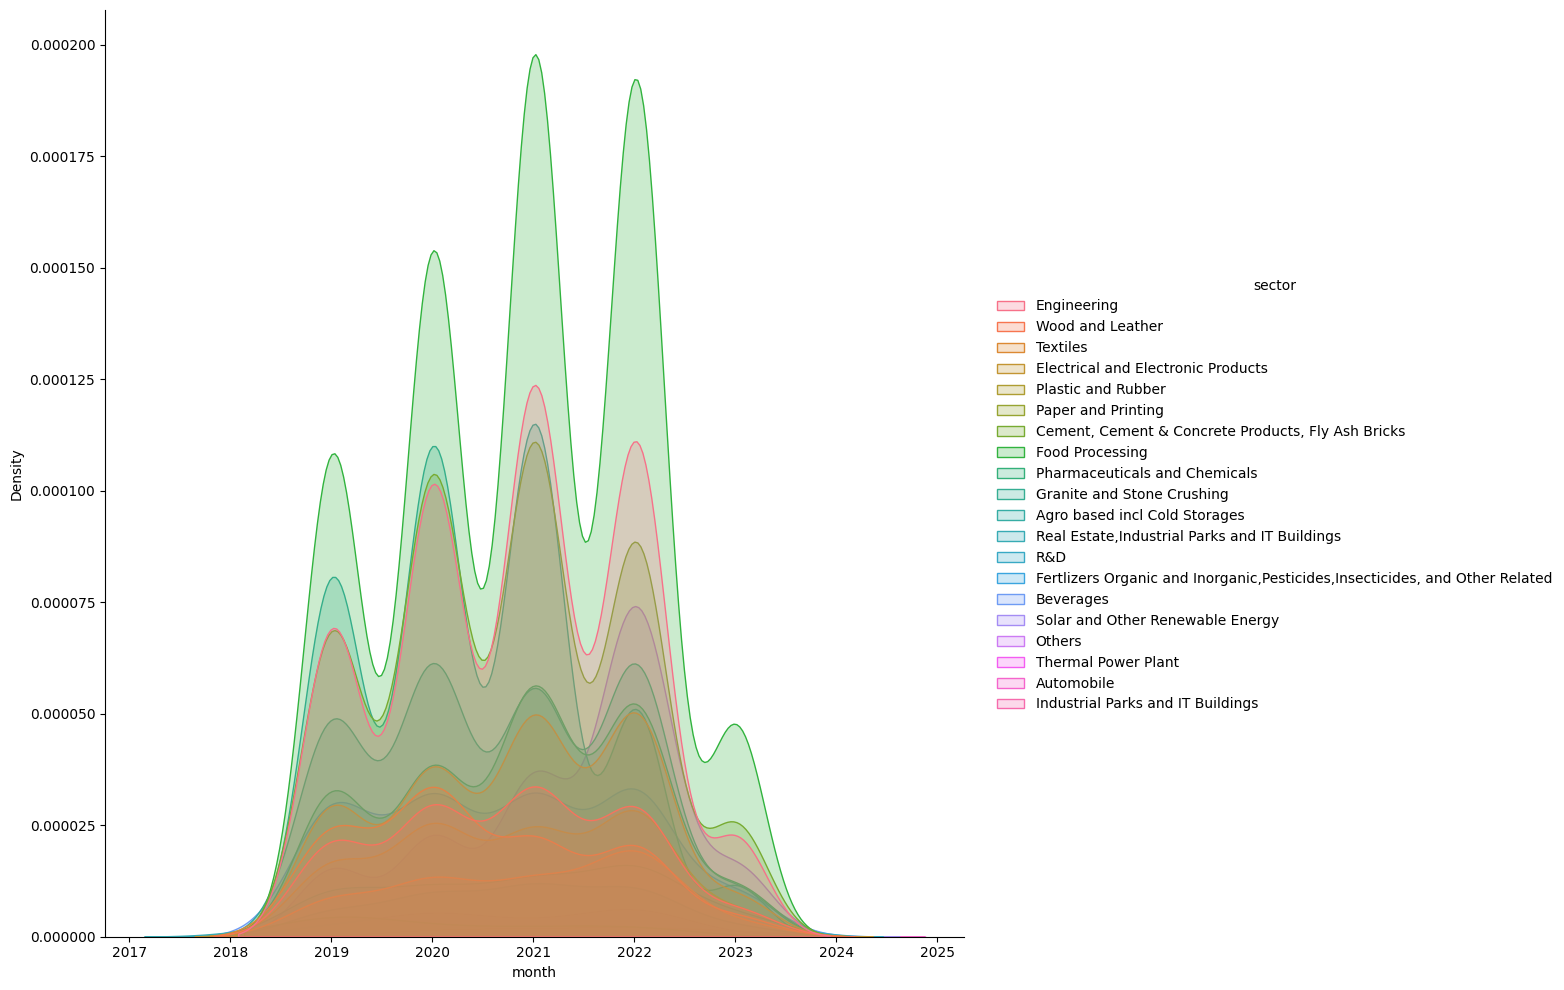

In [ ]:
sns.displot(data=ts_ipass,x="month",kind="kde",hue="sector",fill=True,height=10)